In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import glob
import os

In [86]:
def getIndices():
    prefix = "/mnt/scratch2/puff_benchmark_ismb/out/benchmarks"
    ref_type = {'genome':'k31_n_GRCh38.primary_assembly.genome.fixed',
                'txome':'k31_n_gencode.v25.pc_transcripts_fixed'}
    stage_type = {'index':'.','lookup':'_'}
    tool_type = {'pufferfish_dense':'puffer.index',
                 'pufferfish_sparse':'puffer.index.sparse',
                 'bwa':'bwa.index',
                 'kallisto':'kallisto.index',
                 'pufferize':'puffer.pufferize',
                 'twopaco':'puffer.twopaco'}
    index_dict = {}
    for ref in ref_type.keys():
        df = pd.DataFrame()
        for tool in tool_type.keys():
            filename = os.sep.join([prefix,ref_type[ref]+'.'+tool_type[tool]+'.benchmark.txt'])
            if os.path.isfile(filename):
                if(len(df) == 0):
                    df = pd.read_table(filename)
                    df.index = [tool]
                else:
                    dftmp = pd.read_table(filename)
                    dftmp.index = [tool]
                    df = pd.concat([df,dftmp])
        index_dict[ref] = df
    return index_dict
def getLookup():
    prefix = "/mnt/scratch2/puff_benchmark_ismb/out/benchmarks"
    ref_type = {'genome':'k31_n_GRCh38.primary_assembly.genome.fixed',
                'txome':'k31_n_gencode.v25.pc_transcripts_fixed'}
    real_read = {'genome':'SRR5833294',
                 'txome':'SRR1215997'}
    stage_type = {'index':'.','lookup':'_'}
    tool_type = {'pufferfish_dense':'puffer',
                 'pufferfish_sparse':'puffer.sparse',
                 'bwa':'bwa',
                 'kallisto':'kallisto'}
    lookup_dict = {}
    for ref in ref_type.keys():
        df = pd.DataFrame()
        foldername = os.sep.join([prefix,ref_type[ref]+'_vs_real_reads'])
        if os.path.isdir(foldername):
            for tool in tool_type.keys():
                filename = os.sep.join([foldername,
                                        real_read[ref]+'.'+tool_type[tool]+'.lookup.benchmark.txt'])
                if os.path.isfile(filename):
                    #print("exists")
                    if(len(df) == 0):
                        df = pd.read_table(filename)
                        df.index = [tool]
                    else:
                        dftmp = pd.read_table(filename)
                        dftmp.index = [tool]
                        df = pd.concat([df,dftmp])
                else:
                    print("does not exits")
                    print(filename)
        lookup_dict[ref] = df
    return lookup_dict

In [87]:
lookup_res = getLookup()
index_res = getIndices()

In [93]:
lookup_res['genome']

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load
bwa,4309.9802,1:11:49,4436.58,4448.09,4434.75,4434.77,4434.64,0.09,0.00
kallisto,1785.6095,0:29:45,110461.12,110555.31,110457.98,110458.64,3495.44,0.14,0.00
pufferfish_sparse,1518.4939,0:25:18,12567.75,12927.25,12556.41,12559.72,11120.60,0.15,98.82
pufferfish_dense,1081.6382,0:18:01,17719.25,18078.96,17707.99,17711.28,16369.17,0.11,92.66


In [94]:
lookup_res['txome']

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load
bwa,2339.6490,0:38:59,305.54,317.00,303.67,303.69,0.00,0.08,0.00
kallisto,314.9921,0:05:14,3333.11,3427.05,3329.81,3330.51,0.00,0.03,0.00
pufferfish_sparse,811.1225,0:13:31,342.25,701.90,330.90,334.17,3331.55,0.09,102.60
pufferfish_dense,449.1932,0:07:29,455.69,815.11,444.16,447.48,0.00,0.05,102.13


In [67]:
glob.glob("/mnt/scratch2/puff_benchmark_ismb/out/benchmarks/\
k31_n_gencode.v25.pc_transcripts_fixed_vs_real_reads/*")

['/mnt/scratch2/puff_benchmark_ismb/out/benchmarks/k31_n_gencode.v25.pc_transcripts_fixed_vs_real_reads/SRR1215997.puffer.lookup.benchmark.txt',
 '/mnt/scratch2/puff_benchmark_ismb/out/benchmarks/k31_n_gencode.v25.pc_transcripts_fixed_vs_real_reads/SRR1215997.puffer.sparse.lookup.benchmark.txt',
 '/mnt/scratch2/puff_benchmark_ismb/out/benchmarks/k31_n_gencode.v25.pc_transcripts_fixed_vs_real_reads/SRR1215997.bwa.lookup.benchmark.txt',
 '/mnt/scratch2/puff_benchmark_ismb/out/benchmarks/k31_n_gencode.v25.pc_transcripts_fixed_vs_real_reads/SRR1215997.kallisto.lookup.benchmark.txt']

In [68]:
glob.glob("/mnt/scratch2/puff_benchmark_ismb/out/benchmarks/\
k31_n_GRCh38.primary_assembly.genome.fixed_vs_real_reads/*")

['/mnt/scratch2/puff_benchmark_ismb/out/benchmarks/k31_n_GRCh38.primary_assembly.genome.fixed_vs_real_reads/SRR5833294.bwa.lookup.benchmark.txt',
 '/mnt/scratch2/puff_benchmark_ismb/out/benchmarks/k31_n_GRCh38.primary_assembly.genome.fixed_vs_real_reads/SRR5833294.puffer.sparse.lookup.benchmark.txt',
 '/mnt/scratch2/puff_benchmark_ismb/out/benchmarks/k31_n_GRCh38.primary_assembly.genome.fixed_vs_real_reads/SRR5833294.puffer.lookup.benchmark.txt',
 '/mnt/scratch2/puff_benchmark_ismb/out/benchmarks/k31_n_GRCh38.primary_assembly.genome.fixed_vs_real_reads/SRR5833294.kallisto.lookup.benchmark.txt']

In [137]:
def getIndicesExt():
    prefix = "/mnt/scratch1/puff_benchmark_ismb/out2"
    
    #ref_type = {'genome':'k31_n_GRCh38.primary_assembly.genome.fixed',
    #            'txome':'k31_n_gencode.v25.pc_transcripts_fixed'}
                
    ref_type = {'txome':'k31_n_gencode.v25.pc_transcripts_fixed'}
    stage_type = {'index':'.','lookup':'_'}
    extensions = [4,5,6,7,8]
    index_dict = {}
    for ref in ref_type.keys():
        list_ref = []
        for e in extensions:
            foldername = os.sep.join([prefix,ref_type[ref]+'.'+'puffer_sparse_idx_'+str(e)])
            thisdict = {}
            thisdict['extension'] = e
            if os.path.isdir(foldername):
                #print("exists")
                for dirpath, dirnames, filenames in os.walk(foldername):
                    for f in filenames:
                        fp = os.path.join(dirpath, f)
                        thisdict[f] = float(os.path.getsize(fp))/(1024.0)
            list_ref.append(thisdict)
        
        index_dict[ref] = pd.DataFrame(list_ref)
    return index_dict

In [160]:
def getIndicesTotal():
    prefix = "/mnt/scratch1/puff_benchmark_ismb/out2"
    folder_tx = "/mnt/scratch2/puff_benchmark_ismb/out/k31_n_gencode.v25.pc_transcripts_fixed.puffer_idx"
    folder_gn = "/mnt/scratch2/puff_benchmark_ismb/out/k31_n_GRCh38.primary_assembly.genome.fixed.puffer_idx"
    #ref_type = {'genome':'k31_n_GRCh38.primary_assembly.genome.fixed',
    #            'txome':'k31_n_gencode.v25.pc_transcripts_fixed'}
    sizes = {}
    withoutExt = 0
    if os.path.isdir(folder_tx):
        for dirpath, dirnames, filenames in os.walk(folder_tx):
            for f in filenames:
                fp = os.path.join(dirpath, f)
                withoutExt += float(os.path.getsize(fp))/(1024.0)
    sizes['txome'] = {}
    sizes['txome']['0'] = withoutExt
    '''
    withoutExt = 0
    if os.path.isdir(folder_gn):
        for dirpath, dirnames, filenames in os.walk(folder_gn):
            for f in filenames:
                fp = os.path.join(dirpath, f)
                withoutExt += float(os.path.getsize(fp))/(1024.0)
    sizes['genome'] = {}
    sizes['genome']['0'] = withoutExt
    '''
    
    ref_type = {'txome':'k31_n_gencode.v25.pc_transcripts_fixed'}
    stage_type = {'index':'.','lookup':'_'}
    extensions = [4,5,6,7,8]
    for ref in ref_type.keys():
        list_ref = []
        for e in extensions:
            foldername = os.sep.join([prefix,ref_type[ref]+'.'+'puffer_sparse_idx_'+str(e)])
            sizes[ref][str(e)] = 0
            if os.path.isdir(foldername):
                #print("exists")
                for dirpath, dirnames, filenames in os.walk(foldername):
                    for f in filenames:
                        fp = os.path.join(dirpath, f)
                        sizes[ref][str(e)] += float(os.path.getsize(fp))/(1024.0)       
    return sizes

In [161]:
sizes = getIndicesTotal()

In [163]:
sizes['txome']

{'0': 397041.548828125,
 '4': 278127.22265625,
 '5': 292734.3720703125,
 '6': 308812.2392578125,
 '7': 325698.4423828125,
 '8': 352257.9580078125}

In [139]:
index_dict['txome']

,canonical.bin,ctable.bin,direction.bin,edge.bin,eqtable.bin,extension,extension.bin,extensionSize.bin,info.json,mphf.bin,presence.bin,rank.bin,reflengths.bin,sample_pos.bin,seq.bin
0,8573.257812,36621.882812,8573.257812,514.59375,12473.425781,4,68585.977539,17146.500977,0.204102,50743.902344,9684.34375,11614.03125,368.5,29999.290039,23228.054688
1,8768.593750,36621.882812,8768.593750,514.59375,12473.425781,5,87685.813477,17537.172852,0.205078,50743.902344,9684.34375,11614.03125,368.5,24725.258789,23228.054688
2,8901.250000,36621.882812,8901.250000,514.59375,12473.425781,6,106814.907227,17802.493164,0.205078,50743.902344,9684.34375,11614.03125,368.5,21143.399414,23228.054688
3,9003.062500,36621.882812,9003.062500,514.59375,12473.425781,7,126042.735352,18006.118164,0.205078,50743.902344,9684.34375,11614.03125,368.5,18394.524414,23228.054688
4,9078.000000,36621.882812,9078.000000,514.59375,12473.425781,8,145247.852539,27233.985352,0.205078,50743.902344,9684.34375,11614.03125,368.5,16371.180664,23228.054688


In [140]:
glob.glob("/mnt/scratch1/puff_benchmark_ismb/out2/*")

['/mnt/scratch1/puff_benchmark_ismb/out2/k31_n_gencode.v25.pc_transcripts_fixed.puffer_sparse_idx_8',
 '/mnt/scratch1/puff_benchmark_ismb/out2/k31_n_gencode.v25.pc_transcripts_fixed.puffer_sparse_idx_4',
 '/mnt/scratch1/puff_benchmark_ismb/out2/k31_n_gencode.v25.pc_transcripts_fixed.puffer_sparse_idx_6',
 '/mnt/scratch1/puff_benchmark_ismb/out2/k31_n_gencode.v25.pc_transcripts_fixed.puffer_sparse_idx_5',
 '/mnt/scratch1/puff_benchmark_ismb/out2/k31_n_gencode.v25.pc_transcripts_fixed.puffer_sparse_idx_7',
 '/mnt/scratch1/puff_benchmark_ismb/out2/benchmarks',
 '/mnt/scratch1/puff_benchmark_ismb/out2/logs',
 '/mnt/scratch1/puff_benchmark_ismb/out2/k31_n_GRCh38.primary_assembly.genome.fixed.puffer_sparse_idx_4']

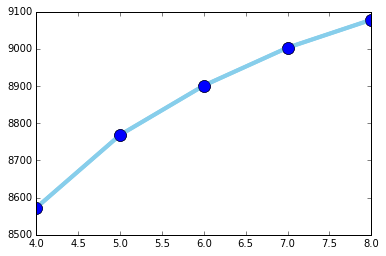

In [143]:
plt.plot( 'extension', 'canonical.bin', data=index_dict['txome'], marker='o', \
         markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'extension', 'direction.bin', data=index_dict['txome'], marker='o', \
         markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'extension', 'extension.bin', data=index_dict['txome'], marker='o', \
         markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)


TypeError: legend() takes at least 3 arguments (1 given)

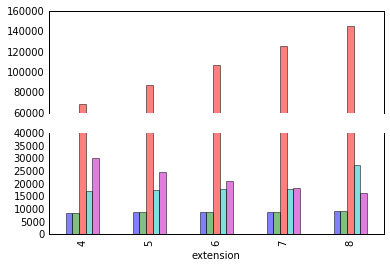

In [174]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
index_dict['txome'].plot(x="extension", y=["canonical.bin", "direction.bin", \
                                          "extension.bin","extensionSize.bin","sample_pos.bin"],\
                         kind="bar",alpha=0.5,ax=ax)
index_dict['txome'].plot(x="extension", y=["canonical.bin", "direction.bin", \
                                          "extension.bin","extensionSize.bin","sample_pos.bin"],\
                         kind="bar",alpha=0.5,ax=ax2)
ax.set_ylim(60000, 160000)  # outliers only
ax2.set_ylim(0, 40000)  # most of the data
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
# Shrink current axis by 20%
box = ax.get_position()
#ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.tick_params(axis=u'both', which=u'both',length=0)
# Put a legend to the right of the current axis
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax.legend_.remove()
ax2.legend_.remove()
f.legend()
# Put a legend to the right of the current axis
#ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

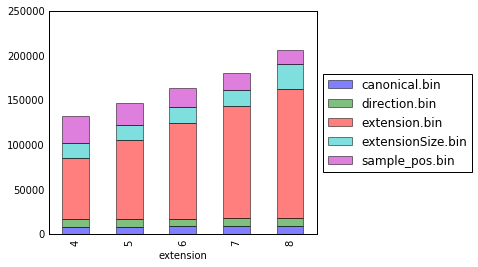

In [158]:
#f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax = index_dict['txome'].plot(x="extension", y=["canonical.bin", "direction.bin", \
                                          "extension.bin","extensionSize.bin","sample_pos.bin"],\
                              kind="bar",alpha=0.5,stacked=True)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.tick_params(axis=u'both', which=u'both',length=0)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

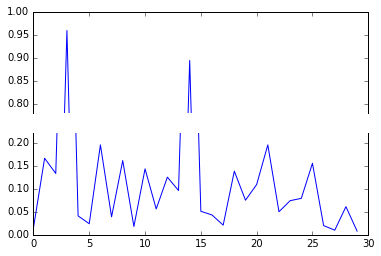

In [155]:
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()